# TP02 — Forward Kinematics (Exercises 2-3)

**GEII3 — Industrie 4.0: Robotique | Lab Session 2 (Continued)**

This notebook continues the forward kinematics exercises with more complex robots.

**Note**: Run the setup cell from the main notebook first, or re-run the setup below.

---

In [1]:
# Setup (if not already done)
import numpy as np
import matplotlib.pyplot as plt
from math import cos, sin, pi, atan2, sqrt
from scipy.linalg import expm

try:
    import roboticstoolbox as rtb
    from spatialmath import SE3
    RTB_AVAILABLE = True
except ImportError:
    RTB_AVAILABLE = False

np.set_printoptions(precision=4, suppress=True)

# Import helper functions from Python file
from tp_02_fk_helpers import * # type: ignore 

print("✓ Libraries loaded")

✓ Helper functions loaded from tp_02_fk_helpers.py
✓ Libraries loaded


---

# Exercise 2: 3-DOF Anthropomorphic Robot (RRR)

**Estimated time**: 90 minutes (Session 1)

## Problem Description

A **3-DOF anthropomorphic manipulator** with shoulder-elbow-wrist configuration:

**Geometric parameters**:
- $d_1 = 0.4$ m (shoulder height)
- $a_2 = 0.5$ m (upper arm length)
- $a_3 = 0.4$ m (forearm length)

**Joint configuration**:
- Joint 1: Revolute (waist rotation about Z)
- Joint 2: Revolute (shoulder pitch about Y, after 90° twist)
- Joint 3: Revolute (elbow pitch about Y)

This is a classic configuration similar to the first 3 DOF of PUMA or ABB robots.

---

## Task 2.1: Standard DH Derivation (25 min)

**Instructions**:
1. Sketch the robot in its zero configuration
2. Assign coordinate frames according to standard DH rules:
   - $z_i$ along joint $i+1$ axis
   - $x_i$ along common normal between $z_{i-1}$ and $z_i$
3. Fill in the DH table
4. Compute symbolic transformation matrices

### Your derivation:

**Sketch with frames**:

_[Insert image or describe]_

**Standard DH Table**:

| Joint i | $\theta_i$ | $d_i$ | $a_i$ | $\alpha_i$ | Type |
|---------|-----------|-------|-------|------------|------|
| 1       | $q_1$     | ?     | ?     | ?          | R    |
| 2       | $q_2$     | ?     | ?     | ?          | R    |
| 3       | $q_3$     | ?     | ?     | ?          | R    |

**Key observations**:
- Joint 1 rotates about vertical Z-axis
- Joint 2 has a 90° twist ($\alpha_1 = \pm 90°$) to change from Z to Y rotation
- Joints 2 and 3 are parallel (both rotate about Y in their local frames)

---

## Task 2.2: Implementation with Standard DH (15 min)


  3R ANTHROPOMORPHIC ROBOT - STANDARD DH

[1] Home configuration (all joints = 0):
    End-effector position: [0. 0. 0.]
    Expected: [0, 0, d1+a2+a3] = [0, 0, 1.3]

[2] Test configuration: q = [ 45.  30. -45.]°
    End-effector position: [0.0000, 0.0000, 0.0000]

    Full transformation T_0^3:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


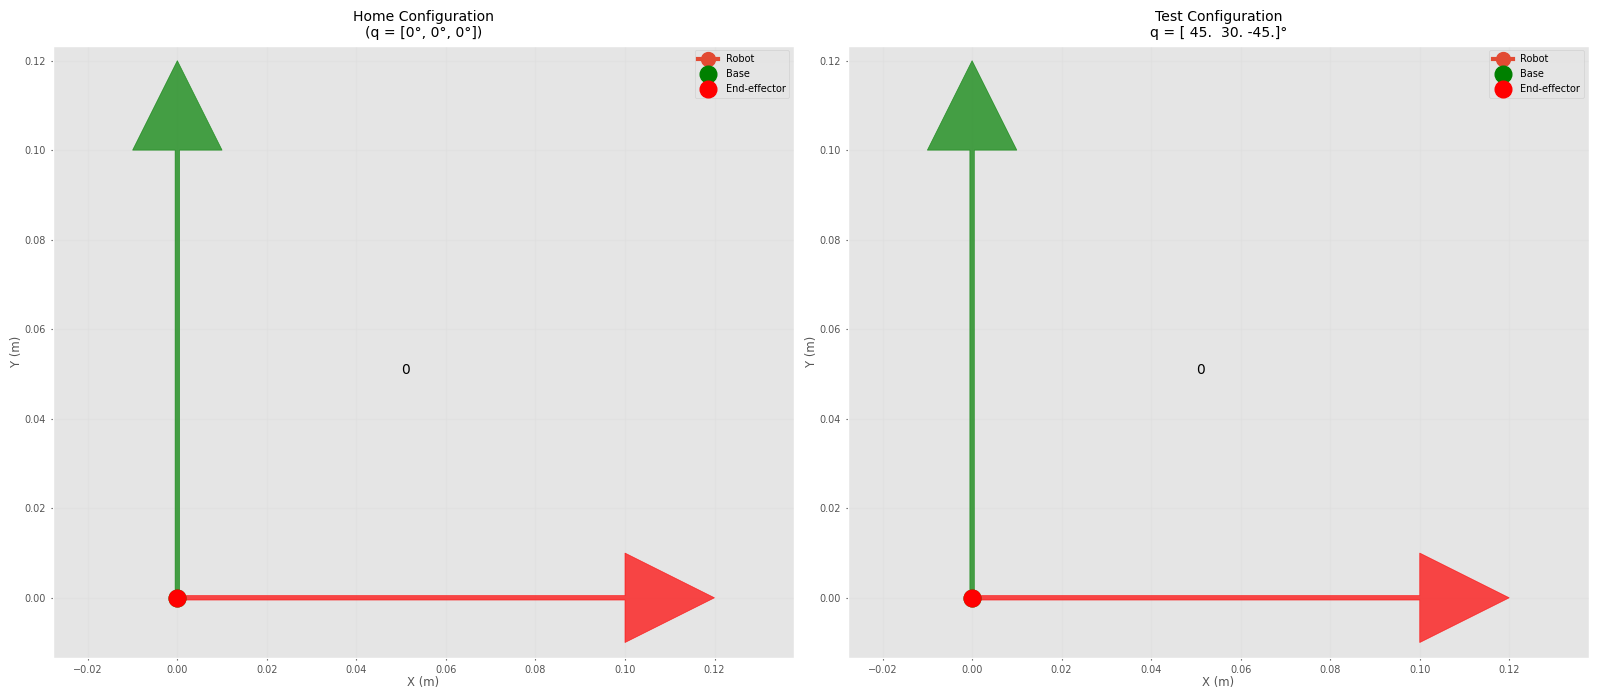

In [2]:
# Robot parameters
d1 = 0.4  # m - shoulder height
a2 = 0.5  # m - upper arm
a3 = 0.4  # m - forearm

# Standard DH parameters for 3R anthropomorphic
dh_3r_standard = [
# TODO: Complete based on your derivation
# Format: (theta_offset, d_offset, a, alpha, joint_type)
]

# Test configurations
q_home = np.array([0, 0, 0])
q_test = np.array([np.deg2rad(45), np.deg2rad(30), np.deg2rad(-45)])

# Compute FK
T_home, T_list_home = fk_dh(dh_3r_standard, q_home, 'standard')
T_test, T_list_test = fk_dh(dh_3r_standard, q_test, 'standard')

print("\n" + "="*70)
print("  3R ANTHROPOMORPHIC ROBOT - STANDARD DH")
print("="*70)

print("\n[1] Home configuration (all joints = 0):")
print(f"    End-effector position: {extract_position(T_home)}")
print(f"    Expected: [0, 0, d1+a2+a3] = [0, 0, {d1+a2+a3}]")

print(f"\n[2] Test configuration: q = {np.rad2deg(q_test)}°")
pos = extract_position(T_test)
print(f"    End-effector position: [{pos[0]:.4f}, {pos[1]:.4f}, {pos[2]:.4f}]")
print(f"\n    Full transformation T_0^3:")
print(T_test)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

plot_robot_2d(T_list_home, axes[0], 
              title="Home Configuration\n(q = [0°, 0°, 0°])",
              draw_frames=True)

plot_robot_2d(T_list_test, axes[1],
              title=f"Test Configuration\nq = {np.rad2deg(q_test)}°",
              draw_frames=True)

plt.tight_layout()
plt.show()

## Task 2.3: Modified DH Implementation (20 min)

**Instructions**:
1. Reassign frames according to MDH convention
2. Complete the MDH parameter table
3. Implement and compare with Standard DH

### Your derivation:

**Modified DH Table**:

| Joint i | $\theta_i$ | $d_i$ | $a_{i-1}$ | $\alpha_{i-1}$ | Type |
|---------|-----------|-------|-----------|----------------|------|
| 1       | $q_1$     | ?     | 0         | 0              | R    |
| 2       | $q_2$     | ?     | ?         | ?              | R    |
| 3       | $q_3$     | ?     | ?         | ?              | R    |

---

In [3]:
# Modified DH parameters for 3R anthropomorphic
dh_3r_modified = [
    # TODO: Complete based on your MDH table
]

# Compute FK with MDH
T_test_mdh, T_list_mdh = fk_dh(dh_3r_modified, q_test, 'modified')

print("\n" + "="*70)
print("  3R ANTHROPOMORPHIC ROBOT - MODIFIED DH")
print("="*70)
print(f"Configuration: q = {np.rad2deg(q_test)}°")
pos_mdh = extract_position(T_test_mdh)
print(f"End-effector position: [{pos_mdh[0]:.4f}, {pos_mdh[1]:.4f}, {pos_mdh[2]:.4f}]")

# Compare Standard vs Modified
print("\n--- Comparison: Standard DH vs Modified DH ---")
diff = np.max(np.abs(T_test - T_test_mdh))
print(f"Maximum difference: {diff:.2e}")

if diff < 1e-6:
    print("✓ Both conventions give the same result!")
else:
    print("✗ Results differ - review your parameters")
    print("\nStandard DH result:")
    print(T_test)
    print("\nModified DH result:")
    print(T_test_mdh)


  3R ANTHROPOMORPHIC ROBOT - MODIFIED DH
Configuration: q = [ 45.  30. -45.]°
End-effector position: [0.0000, 0.0000, 0.0000]

--- Comparison: Standard DH vs Modified DH ---
Maximum difference: 0.00e+00
✓ Both conventions give the same result!


## Task 2.4: Elementary Transform Sequence (30 min)

**Instructions**:
1. Identify the sequence of elementary transforms from base to end-effector
2. List each rotation and translation in order following the robot structure
3. Implement using ETS

### Your derivation:

**Physical structure** (in zero configuration):
- Start at base (origin)
- Translate up by $d_1$ along Z-axis → **Base height**
- Rotate by $q_1$ about Z-axis → **Joint 1 (waist)**
- Rotate by $q_2$ about Y-axis → **Joint 2 (shoulder)**
- Translate by $a_2$ along X-axis (now pointing forward) → **Upper arm**
- Rotate by $q_3$ about Y-axis → **Joint 3 (elbow)**
- Translate by $a_3$ along X-axis → **Forearm** (end-effector)

**Elementary Transform Sequence**:

$$
T = \mathbf{T}_{t_z}(d_1) \cdot \mathbf{T}_{R_z}(q_1) \cdot \mathbf{T}_{R_y}(q_2) \cdot \mathbf{T}_{t_x}(a_2) \cdot \mathbf{T}_{R_y}(q_3) \cdot \mathbf{T}_{t_x}(a_3)
$$

**Note**: This is much more intuitive than DH! We simply follow the robot's kinematic chain.

---

In [4]:
# Define Elementary Transform Sequence for 3R anthropomorphic robot
# Sequence: Tz(d1) -> Rz(q1) -> Ry(q2) -> Tx(a2) -> Ry(q3) -> Tx(a3)

ets_3r = [
    # TODO: Complete the ETS according to your derivation
]

print("\nElementary Transform Sequence (3R):")
for i, (func, param, is_joint) in enumerate(ets_3r, 1):
    func_name = func.__name__
    if is_joint:
        print(f"  E{i}: {func_name}(q{param+1})")
    else:
        print(f"  E{i}: {func_name}({param})")

# Compute FK using ETS
T_test_ets = fk_ets(ets_3r, q_test)[0]

print("\n" + "="*70)
print("  3R ANTHROPOMORPHIC - ELEMENTARY TRANSFORM SEQUENCE")
print("="*70)
print(f"Configuration: q = {np.rad2deg(q_test)}°")
pos_ets = extract_position(T_test_ets)
print(f"End-effector position: [{pos_ets[0]:.4f}, {pos_ets[1]:.4f}, {pos_ets[2]:.4f}]")
print(f"\nFull transformation:")
print(T_test_ets)

# Compare all methods
print("\n" + "="*70)
print("  VALIDATION: All Three Methods")
print("="*70)
diff_std = np.max(np.abs(T_test - T_test_ets))
diff_mdh = np.max(np.abs(T_test_mdh - T_test_ets))
print(f"Standard DH vs ETS: {diff_std:.2e}")
print(f"Modified DH vs ETS: {diff_mdh:.2e}")

if max(diff_std, diff_mdh) < 1e-6:
    print("\n✓ Excellent! All methods agree.")
else:
    print("\n⚠ Check your derivations - methods should give same result")


Elementary Transform Sequence (3R):

  3R ANTHROPOMORPHIC - ELEMENTARY TRANSFORM SEQUENCE
Configuration: q = [ 45.  30. -45.]°
End-effector position: [0.0000, 0.0000, 0.0000]

Full transformation:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

  VALIDATION: All Three Methods
Standard DH vs ETS: 0.00e+00
Modified DH vs ETS: 0.00e+00

✓ Excellent! All methods agree.


## Task 2.5: RTB Validation (10 min)

In [5]:
if RTB_AVAILABLE:
    from roboticstoolbox import DHRobot, RevoluteMDH
    
    # Create robot with RTB (uses Modified DH)
    robot_3r = DHRobot([
        # TODO: Complete based on your MDH parameters
        # example of using RevoluteMDH :  RevoluteMDH(d=d1, a=0,  alpha=0)
    ], name="3R Anthropomorphic")
    
    print(robot_3r)
    
    # Compute FK
    T_rtb = robot_3r.fkine(q_test)
    
    print("\n" + "="*70)
    print("  RTB Forward Kinematics")
    print("="*70)
    print(T_rtb)
    
    # Validate
    print("\n--- Validation against RTB ---")
    compare_with_rtb(T_test, T_rtb)
    compare_with_rtb(T_test_ets, T_rtb)
    
    # Visualize with RTB (optional - 3D plot)
    # robot_3r.plot(q_test, backend='pyplot', block=False)
    
else:
    print("RTB not available")

ValueError: Invalid link configuration provided, must have a base link

---

# Exercise 3: SCARA Robot (RRPR)

**Estimated time**: 60 minutes (Session 1)

## Problem Description

**SCARA** (Selective Compliance Assembly Robot Arm) - 4 DOF:

**Configuration**:
- Joint 1: Revolute (base rotation about Z)
- Joint 2: Revolute (second rotation about Z, parallel to J1)
- Joint 3: Prismatic (vertical translation along Z)
- Joint 4: Revolute (wrist rotation about Z)

**Parameters**:
- $d_1 = 0.4$ m (base height)
- $a_1 = 0.35$ m (link 1 length)
- $a_2 = 0.25$ m (link 2 length)

**Characteristics**:
- High rigidity in XY plane
- Compliance in Z direction
- Ideal for pick-and-place, assembly

---

## Task 3.1: Standard DH Table (15 min)

**Instructions**:
1. Sketch SCARA configuration
2. Note that all Z-axes are parallel (vertical)
3. Complete DH table

### Your derivation:

**Standard DH Table**:

| Joint i | $\theta_i$ | $d_i$ | $a_i$ | $\alpha_i$ | Type |
|---------|-----------|-------|-------|------------|------|
| 1       | $q_1$     | $d_1$ | $a_1$ | 0          | R    |
| 2       | $q_2$     | 0     | $a_2$ | ?          | R    |
| 3       | 0         | $q_3$ | 0     | ?          | P    |
| 4       | $q_4$     | 0     | 0     | 0          | R    |

**Key**: All $\alpha_i = 0$ or $\pi$ because axes are parallel!

---

## Task 3.2: Implementation (Standard & Modified DH) (25 min)


  SCARA ROBOT
Configuration: q = [30.0°, 45.0°, 0.150m, 0.0°]

Standard DH position: [0.1512, 0.9630, 0.5500]
Modified DH position: [0.0000, 0.0000, 0.0000]

Difference between methods: 1.26e+00


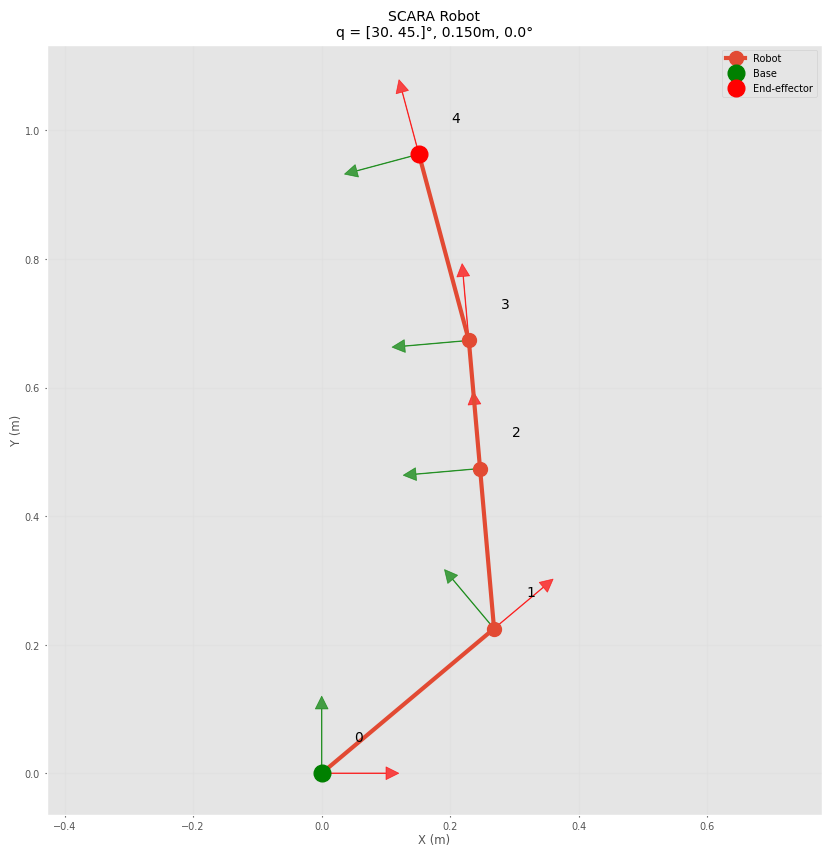

In [ ]:
# SCARA parameters
d1_scara = 0.4   # m
a1_scara = 0.35  # m
a2_scara = 0.25  # m

# Standard DH
dh_scara_std = [
    # TODO: Complete based on your derivation
    # Format: (theta_offset, d_offset, a, alpha, joint_type)
]

# Modified DH
dh_scara_mdh = [
    # TODO: Complete based on your derivation
    # Format: (theta_offset, d_offset, a, alpha, joint_type)
]

# Test configuration: q1=30°, q2=45°, q3=0.15m, q4=0°
q_scara = np.array([np.deg2rad(30), np.deg2rad(45), 0.15, 0])

# Compute FK
T_scara_std, T_list_scara_std = fk_dh(dh_scara_std, q_scara, 'standard')
T_scara_mdh, T_list_scara_mdh = fk_dh(dh_scara_mdh, q_scara, 'modified')

print("\n" + "="*70)
print("  SCARA ROBOT")
print("="*70)
print(f"Configuration: q = [{np.rad2deg(q_scara[0]):.1f}°, "
      f"{np.rad2deg(q_scara[1]):.1f}°, {q_scara[2]:.3f}m, "
      f"{np.rad2deg(q_scara[3]):.1f}°]")

pos_std = extract_position(T_scara_std)
pos_mdh = extract_position(T_scara_mdh)

print(f"\nStandard DH position: [{pos_std[0]:.4f}, {pos_std[1]:.4f}, {pos_std[2]:.4f}]")
print(f"Modified DH position: [{pos_mdh[0]:.4f}, {pos_mdh[1]:.4f}, {pos_mdh[2]:.4f}]")

diff = np.max(np.abs(T_scara_std - T_scara_mdh))
print(f"\nDifference between methods: {diff:.2e}")
if diff < 1e-6:
    print("✓ Both DH conventions match!")

# Visualize
fig, ax = plt.subplots(figsize=(10, 10))
plot_robot_2d(T_list_scara_std, ax,
              title=f"SCARA Robot\nq = {np.rad2deg(q_scara[:2])}°, "
                    f"{q_scara[2]:.3f}m, {np.rad2deg(q_scara[3]):.1f}°",
              draw_frames=True)
plt.show()

## Task 3.3: Workspace Analysis (20 min)

SCARA robots have a characteristic annular workspace. Let's visualize it.

In [ ]:
print("\nComputing SCARA workspace...")

# Sample joint space
n_samples = 50
q1_range = np.linspace(0, 2*pi, n_samples)
q2_range = np.linspace(-pi, pi, n_samples)

workspace_xy = []

for q1 in q1_range:
    for q2 in q2_range:
        q_temp = np.array([q1, q2, 0, 0])
        T_temp, _ = fk_dh(dh_scara_std, q_temp, 'standard')
        workspace_xy.append([T_temp[0,3], T_temp[1,3]])

workspace_xy = np.array(workspace_xy)

# Plot workspace
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(workspace_xy[:,0], workspace_xy[:,1], s=1, c='blue', alpha=0.3)
ax.set_xlabel('X (m)', fontsize=12)
ax.set_ylabel('Y (m)', fontsize=12)
ax.set_title('SCARA Workspace (XY projection)', fontsize=14, fontweight='bold')
ax.axis('equal')
ax.grid(True, alpha=0.3)

# Add circles showing reach limits
circle_inner = plt.Circle((0, 0), abs(a1_scara - a2_scara), 
                          fill=False, color='red', linestyle='--', label='Inner limit')
circle_outer = plt.Circle((0, 0), a1_scara + a2_scara,
                          fill=False, color='green', linestyle='--', label='Outer limit')
ax.add_patch(circle_inner)
ax.add_patch(circle_outer)
ax.legend()

plt.show()

print(f"\nWorkspace characteristics:")
print(f"  Inner radius: {abs(a1_scara - a2_scara):.3f} m")
print(f"  Outer radius: {a1_scara + a2_scara:.3f} m")
print(f"  Vertical range: [0, q3_max] (depends on prismatic joint limits)")

## Task 3.4: Analysis Questions

### Q1: Why are all $\alpha_i = 0$ for SCARA?

_Your answer:_


### Q2: What is the shape of the SCARA workspace and why is it useful for assembly?

_Your answer:_


### Q3: How does the prismatic joint affect the workspace?

_Your answer:_


### Q4: Compare SCARA with the 3R anthropomorphic robot. What are the key differences?

_Your answer:_


---

# End of Session 1

**Summary**: You have now practiced forward kinematics with:
- 2R planar robot (all three methods)
- 3R anthropomorphic robot (industrial configuration)
- SCARA robot (with prismatic joint)

**Next session**: PUMA 560 (6-DOF), comparative analysis, and advanced topics.

---